# ==========================================================
# Análisis Exploratorio de Datos (EDA)
# Dataset: Netflix Titles
# Grupo: 05
# ==========================================================

In [27]:
# 📦 Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
# Configuración de gráficos
plt.style.use('ggplot')
sns.set_palette('Set2')

# ==========================================================
# Crear carpeta para guardar gráficos si no existe
# ==========================================================

In [28]:
output_dir = '../results/grupo05_graficos'
os.makedirs(output_dir, exist_ok=True)


# ==========================================================
# 1️⃣ Cargar el dataset
# ==========================================================

In [5]:
df = pd.read_csv('../data/raw/netflix_titles.csv')

# Mostrar información general
print("✅ Dataset cargado correctamente.")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()

✅ Dataset cargado correctamente.
Filas: 8807, Columnas: 12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# ==========================================================
# 2️⃣ Inspección general
# ==========================================================

In [6]:
print("\n🧩 Información general del dataset:")
df.info()

print("\n📊 Descripción de columnas numéricas:")
df.describe()

print("\n❌ Valores nulos por columna:")
print(df.isnull().sum())


🧩 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

📊 Descripción de columnas numéricas:

❌ Valores nulos por columna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
r

# ==========================================================
# 3️⃣ Distribución por tipo (Películas vs Series)
# ==========================================================

C:\Users\PCE\AppData\Local\Temp\ipykernel_17372\461742852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


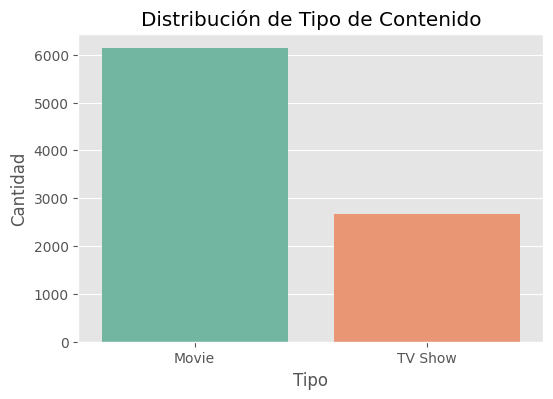

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribución de Tipo de Contenido')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.savefig(f"{output_dir}/tipo_contenido.png")
plt.show()

# ==========================================================
# 4️⃣ Top 10 países con más títulos
# ==========================================================

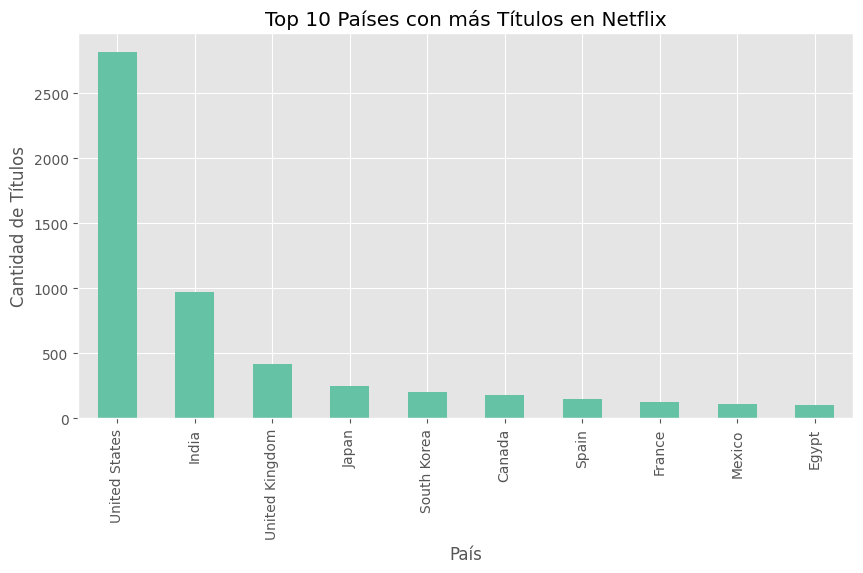

In [30]:
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Países con más Títulos en Netflix')
plt.xlabel('País')
plt.ylabel('Cantidad de Títulos')
plt.savefig(f"{output_dir}/top_paises.png")
plt.show()

# ==========================================================
# 5️⃣ Distribución por año de lanzamiento
# ==========================================================

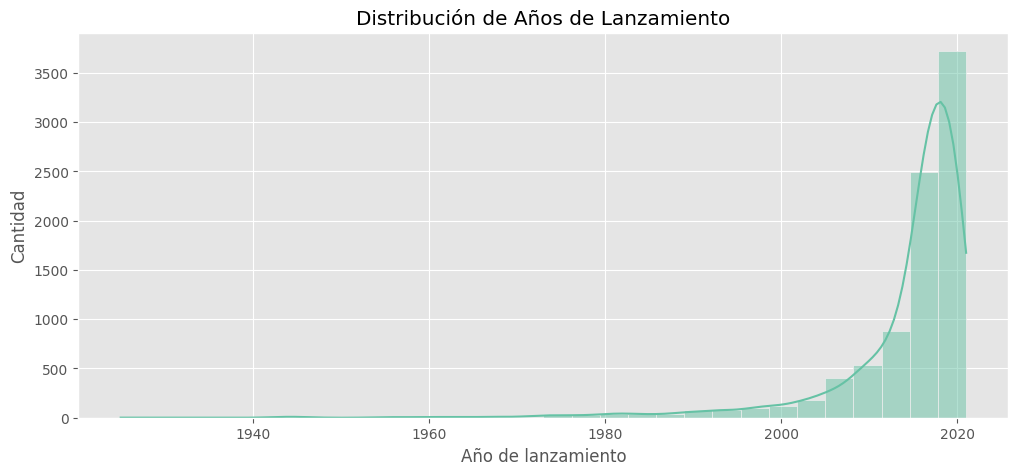

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.savefig(f"{output_dir}/distribucion_anios.png")
plt.show()

# ==========================================================
# 6️⃣ Duración media por tipo de contenido
# ==========================================================

In [33]:
# Nota: algunas duraciones son "X Seasons" en vez de minutos
movie_duration = df[df['type'] == 'Movie']['duration'].dropna()
series_duration = df[df['type'] == 'TV Show']['duration'].dropna()

print("\n🎬 Ejemplo de valores de duración:")
print(df['duration'].head(10))


🎬 Ejemplo de valores de duración:
0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object


# ==========================================================
# 7️⃣ Limpieza básica de columna 'duration'
# ==========================================================

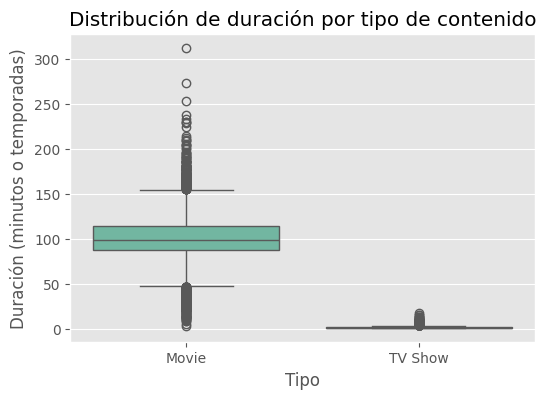

In [34]:
def parse_duration(x):
    try:
        return int(x.split()[0])
    except:
        return np.nan

df['duration_num'] = df['duration'].apply(parse_duration)

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='type', y='duration_num')
plt.title('Distribución de duración por tipo de contenido')
plt.xlabel('Tipo')
plt.ylabel('Duración (minutos o temporadas)')
plt.savefig(f"{output_dir}/duracion_tipo.png")
plt.show()

# ==========================================================
# 8️⃣ Top 10 directores con más producciones
# ==========================================================

C:\Users\PCE\AppData\Local\Temp\ipykernel_17372\2050100240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directores.values, y=top_directores.index, palette='coolwarm')


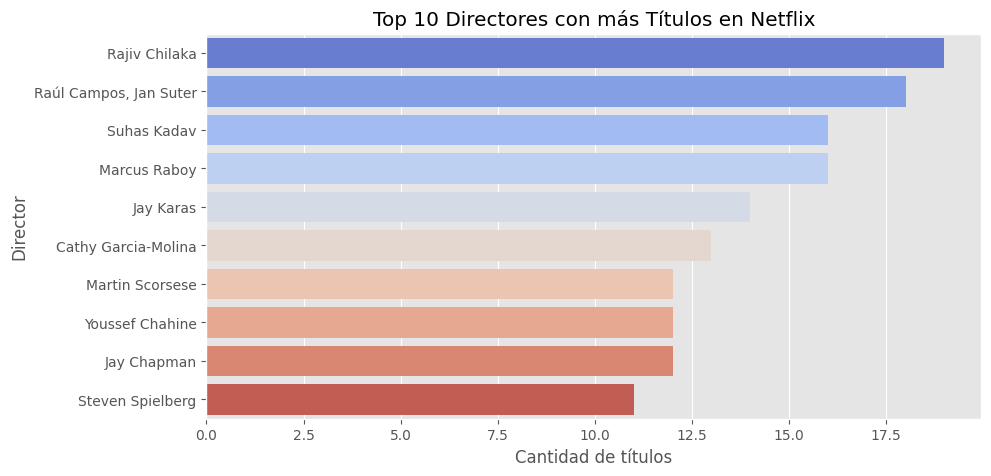

In [35]:
top_directores = df['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directores.values, y=top_directores.index, palette='coolwarm')
plt.title('Top 10 Directores con más Títulos en Netflix')
plt.xlabel('Cantidad de títulos')
plt.ylabel('Director')
plt.savefig(f"{output_dir}/top_directores.png")
plt.show()

# ==========================================================
# 9️⃣ Guardar dataset limpio
# ==========================================================

In [15]:
df.to_csv('../data/processed/netflix_clean.csv', index=False)
print("\n💾 Dataset limpio guardado en: ../data/processed/netflix_clean.csv")

print("\n✅ EDA inicial finalizado correctamente.")


💾 Dataset limpio guardado en: ../data/processed/netflix_clean.csv

✅ EDA inicial finalizado correctamente.
